- 지금까지 데이터가 2차원 실수형 배열로 각 열이 데이터 포인트를 설명하는 연속형 특성(Continuous Feature)이라고 가정
- 하지만 많은 애플리케이션에서 이렇게 데이터가 수집되지는 않음
- 일반적인 특성의 전형적인 형태는 범주형 특성 (Categorical Feature)임
- 또한 이산형 특성 (Discrete Feature)이라고도 하는 이런 특성은 보통 숫자 값이 아님
- 범주형 특성과 연속적인 특성 사이의 차이는 분류와 회귀의 차이와 비슷하지만, 출력이 아닌 입력에 대한 것이란 점이 다름
- 앞서 본 연속형 특성의 예로는 픽셀 밝기와 붓꽃 측정값이 있음
- 범주형 특성의 예로는 제품의 브랜드, 색상, 판매분류 (책, 옷, 하드웨어) 등이 있음
- 이런 특성들은 모두 상품을 묘사하는 속성이지만 연속된 값으로 나타나지 않음
- 한 제품은 옷에 속하거나 책에 속하고, 책과 옷 사이에는 중간값이 없고 이 카테고리들 사이에는 순서가 없음 (책이 옷보다 크거나 작지 않고, 하드웨어는 책과 옷 사이에 있지 않음)
- 하지만 데이터가 어떤 형태의 특성으로 구성되어 있는가보다 데이터를 어떻게 표현하는가가 머신러닝 모델의 성능에 주는 영향이 더 큼
- 데이터의 스케일이 중요성은 데이터의 스케일을 조정하지 않으면(예컨데 단위 분산으로), 측정치가 센티미터냐 인치냐에 따라 차이가 생김
- 특성의 상호작용(특성 간의 곱)이나 일반적인 다항식을 추가 특성으로 넣는 것이 도움될 수 있음
- 특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것을 특성 공학 (Feature Engineering)이라 하며, 데이터 과학자와 머신러닝 기술자가 실제 문제를 풀기 위해 당면하는 주요 작업 중 하나임
- 올바른 데이터 표현은 지도 학습 모델에서 적절한 매개변수를 선택하는 것보다 성능에 더 큰 영향을 미침
- 범주형 특성의 보편적이고 중요한 사례를 살펴보고, 특정 모델에 잘 맞도록 특성을 변환하는 예를 살펴봄

# 1. Categorical Feature (범주형 특성)
- 예제에 사용할 데이터는 1994년 인구 조사 데이터베이스에서 추출한 미국 성인의 소득 데이터셋
- 이 adult 데이터셋을 사용해 어떤 근로자의 수입이 50,000달러를 초과하는지, 그 이하일지를 예측하려고 함
- 데이터셋에는 근로자 나이(age), 고용형태(workclass)(자영업(self-emp-not-inc), 사업체 근로자(private), 공공 근로자(state-gov)), 고육 수준(education), 성별(gender), 주당 근로시간(hours-per-week), 직업(occupation) 등의 특성이 있음
- 이 작업은 소득(income)이 <=50k와 >50k라는 두 클래스를 가진 분류 문제로 볼 수 있음
- 정확한 소득을 예측할 수도 있지만, 그러면 회귀 문제가 되지만 이는 훨씬 어렵기도 하고 5만 달러 기준만으로도 재미있는 문제
- 이 데이터셋에 있는 age와 hours-per-week는 우리가 다뤄본 연속형 특성
- 그런데 workclass, education, sex, occupation은 범주형 특성
- 이런 특성들은 어떤 범위가 아닌 고정된 목록 중 하나를 값으로 가지며, 정량적이 아니고 정성적인 속성

## 1-1. 원-핫-인코딩 (One-Hot_Encoding 가변수)
- 범주형 변수를 표현하는 데 가장 널리 쓰이는 방법은 원-핫-인코딩
- 이를 원-아웃-오브-엔 인코딩(one-out-of-N encoding) 혹은 가변수(dummy variable)ㅇ라고도 함
- 가변수는 범주형 변수를 0 또는 1 값을 가진 하나 이상의 새로운 특성으로 바꾼 것
- 0과 1로 표현된 변수는 선형 이진 분류 공식에 (그리고 scikit-learn에 있는 다른 모든 모델에) 적용할 수 있어서, 다음과 같이 개수에 상관없이 범주마다 하나의 특성으로 표현함
- workclass 특성에 "Government Employee", "Private Employee", "Self Employed", "Self Employed Incorportated"란 값이 있다고 가정
- 이 네 가지 값을 인코딩하기 위해 네 개의 새로운 특성 "Government Employee", "Private Employee", "Self Employed", "Self Employed Incorportated"를 만듦
- 어떤 사람의 workclass 값에 해당하는 특성은 1이 되고 나머지 세 특성은 0이 됨
- 즉 데이터 포인트마다 정확히 네 개의 새로운 특성 중 하나는 1이 됨
- 그래서 원-핫 또는 원-아웃-오브-엔 인코딩이라고 함
- 머신러닝 알고리즘에 이 데이터를 적용할 때는 원래 workclass 특성은 빼고 0과 1로 된 특성만을 사용
- 사용하는 원-핫 인코딩은 통계학에서 사용하는 더미 코딩(dummy coding)과 비슷하지만 완전히 같지는 않음
- 간편하게 하려고 각 범주를 각기 다른 이진 특성으로 바꾸었음
- 통계학에서는 k개의 값을 가진 범주형 특성을 k-1개의 특성으로 변환하는 것이 일반적(마지막 범주는 모든 열이 0으로 표현됨)
- 이렇게 하는 이유는 분석의 편리성 때문(더 기술적으로 말하면, 데이터 행렬의 랭크 부족(rank deficient) 형상을 피하기 위해서 임)
- pandas나 scikit-learn을 이욯하여 범주형 변수를 원-핫 인코딩으로 바꿀 수 있음

In [1]:
# pandas를 이용해 CVS 파일에서 데이터를 읽음
import os
import mglearn
import pandas as pd
# 이 파일은 열 이름을 나타내는 헤더가 없으므로 header=None으로 지정하고
# "names" 매개변수로 열 이름을 제공
# adult 데이터셋의 처음 다섯 개의 행
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False, names=["age", "workclass", "fnlwgt", "education", "education-num", "matrial-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
# 예제를 위해 몇 개의 열만 선택
data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### 문자열로 된 범주형 데이터 확인하기
- 데이터셋을 읽고 나면, 먼저 열에 어떤 의미 있는 범주형 데이터가 있는지 확인해보는 것이 좋음
- 사용자로부터 (ex) 웹사이트 방문자) 입력받은 데이터를 다룰 때는 정해진 범주 밖의 값이 있을 수 있고 철자나 대문자가 틀려서 데이터를 전처리해야 할 수 있음
- 예를 들어 사람에 따라 남성을 "male" 또는 "man"이라고 할 수 있으므로 두 입력값을 모두 같은 범주로 인식해야 함
- 열의 내용을 확인하는 좋은 방법은 pandas에서 (DateFrame의 열을 나타내는) Series에 있는 value_counts 메서드를 사용하여 유일한 값이 각각 몇 번 나타나는지 출력해보는 것

In [2]:
print(data.gender.value_counts())

gender
 Male      21790
 Female    10771
Name: count, dtype: int64


- 이 데이터셋의 gender는 정확히 두 가지 값, Male과 Female을 가지고 있어서 원-핫-인코딩으로 나타내기 좋은 형태
- 실제 애플리케이션에서는 모든 열을 살펴보고 그 값들을 확인해야 함
- pandas에서는 get_dummies 함수를 사용해 데이터를 매우 쉽게 인코딩할 수 있음
- get_dummies 함수는 객체 타입(문자열 같은)이나 범주형을 가진 열을 자동으로 변환해 줌

In [3]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

- 연속적 특성인 age와 hours-per-week는 그대로지만 범주형 특성은 값마다 새로운 특성으로 확장되었음

In [4]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,50,13,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,38,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,53,40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,28,40,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


- data_dummies의 values 속성을 이용해 DataFrame을 NumPy 배열로 바꿀 수 있으며, 이를 이용해 머신러닝 모델을 학습시킴
- 모델을 학습시키기 전에 이 데이터로부터 (income으로 시작하는 두 열에 인코딩된) 타깃 값을 분리해야 함
- 출력값이나 출력값으로부터 유도된 변수를 특성 표현에 포함하는 것은 지도 학습 모델을 만들 때 특히 저지르기 쉬운 실수임
- pandas에서 열 인덱싱은 범위 끝을 포함하므로, 'age:'occupation_ Transport-moving'이라 하면 'occupation_ Transport-moving'을 포함
- 이와 달리 NumPy 배열의 슬라이싱은 마지막 범위를 포함하지 않음 (ex) np.arange(11)[0:10]은 인덱스 10인 항목을 포함하지 않음)

In [5]:
# 특성을 포함한 열, 즉 age부터 occupation_ Transport-moving까지 모든 열을 추출
# 이 범위에는 타깃을 뺀 모든 특성이 포함
features = data_dummies.loc[:, "age":"occupation_ Transport-moving"]
# NumPy 배열 추출
X = features.values
y = data_dummies["income_ >50K"].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [6]:
# 이제 데이터가 scikit-learn에서 사용할 수 있는 형태가 되었으므로, 이전과 같은 방식을 사용할 수 있음
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


- 위 예에서 훈련 데이터와 테스트 데이터를 모두 담고 있는 DataFrame을 사용해 get_dummies를 호출
- 이는 훈련 세트와 테스트 세트에 범주형 값이 같은 방식으로 표현되어야 하기 때문
- 훈련 세트와 테스트 세트를 두 개의 서로 다른 DataFrame으로 가지고 있다고 가정
- workclass 특성의 "Private Employee" 값이 테스트 세트에 나타나지 않으면 pandas는 이 특성의 값이 세 개뿐이라 판단하고 세 개의 가변수 특성을 만듦
- 그러면 훈련 세트와 테스트 세트의 특성 개수가 달라지고 훈련 세트에서 학습된 모델을 테스트 세트에 적용할 수 없게 됨
- 더 심각하게 workclass 특성이 훈련 세트는 "Government Employee"와 "Private Employee"를 가지고 있고 테스트 세크는 "Self Employed"와 "Self Employed Incorporated"를 가지고 있다고 생각
- pandas는 양쪽 모두 두 개의 새로운 가변수 특성을 추가하게 되고, 결국 만들어진 두 DataFrame의 특성 갯수는 같을 것
- 그러나 가변수 특성 두 개는 훈련 세트와 테스트 세트에서 완전히 다른 의미를 가지고 있음
- 즉 훈련 세트에서 "Government Employee"를 나타내는 열은 테스트 세트에서는 "Self Employed"를 의미하게 됨
- 사실 매우 다른 의미의 두 열을 (위치가 같다는 이유로) 같은 것이라고 생각하기 때문에, 이런 데이터로 머신러닝 모델을 만들면 매우 나쁜 결과를 얻게 됨
- 이런 문제를 겪지 않으려면 훈련 데이터와 테스트 데이터 포인트를 모두 포함하는 DataFrame을 사용해 get_dummies 함수를 호출하든지, 각각 get_dummies를 호출한 후에 훈련 세트와 테스트 세트의 열 이름을 비교해서 같은 속성인지를 먼저 확인해야 함

## 1-2. 숫자로 표현된 범주형 특성
- adult 데이터셋에서는 범주형 변수가 문자열로 인코딩되어 있음
- 철자 오류가 날 수 있지만, 다른 한편으로는 변수가 범주형이란 것을 확실하게 알려줌
- 하지만 저장 공간을 절약하거나 데이터 취합 방식에 따라 범주형 변수가 숫자로 인코딩된 경우가 많음
- 예를 들어 adult 데이터셋에 있는 인구조사 데이터가 설문지를 이용해 모은 것이라 가정하면 workclass에 대한 대답은 0(첫 번째 체크박스), 1(두 번째 체크박스), 2(세 번째 체크박스) 등이 됨
- 그럼 이 열은 "Private" 같은 문자열이 아니라 0에서 8까지의 숫자로 채워지게 됨
- 누군가 이 데이터셋을 보면 이 변수를 연속형으로 다뤄야 할지 범주형으로 다뤄야 할지 단번에는 알아채기 어려움
- 그러나 숫자가 workclass를 나타낸다고 알게 되면, 이 값은 이산적이므로 연속형 변수로 다루면 안 된다는 것이 명확해짐
- 범주형 특성은 종종 숫자로 인코딩됨
- 특성의 값이 숫자라고 해서 연속형 특성으로 다뤄야 한다는 의미는 아님
- 숫자로 된 특성이 연속적인지 또는 이산적인지는 (그리고 원-핫-인코딩된 것인지는) 항상 명확하지는 않음
- 인코딩된 값 사이에 (workclass처럼) 어떤 순서도 없으면, 이 특성은 이산적이라고 생각해야 함
- 예컨대 별 다섯 개 만점으로 매긴 평점 데이터 같은 경우에 적절한 인코딩 방법은 풀려는 문제나 데이터, 그리고 어떤 머신러닝 알고리즘을 사용할지에 달렸음

In [7]:
# pandas의 get_dummies 함수는 숫자 특성은 모두 연속형이라고 생각해서 가변수를 만들지 않음
# 예를 들기 위해 각각 문자열과 숫자로 표현된 두 개의 범주형 특성을 가진 DataFrame 객체를 만듦
demo_df = pd.DataFrame({"숫자 특성": [0, 1, 2, 1], "범주형 특성": ["양말", "여우", "양말", "상자"]})
demo_df

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [8]:
# get_dummies를 사용하면 문자열 특성만 인코딩되며 숫자 특성은 바뀌지 않음
pd.get_dummies(demo_df)

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,False,True,False
1,1,False,False,True
2,2,False,True,False
3,1,True,False,False


In [9]:
# '숫자 특성'도 가변수로 만들고 싶다면 columns 매개변수에 인코딩하고 싶은 열을 명시해야 함
# 그러면 두 특성을 모두 범주형으로 간주
demo_df["숫자 특성"] = demo_df["숫자 특성"].astype(str)
pd.get_dummies(demo_df, columns=["숫자 특성", "범주형 특성"])

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,True,False,False,False,True,False
1,False,True,False,False,False,True
2,False,False,True,False,True,False
3,False,True,False,True,False,False


# 2. OneHotEncoding 와 ColumnTransformer: scikit-learn으로 범주형 변수 다루기
- 이전에 언급한 것처럼 scikit-learn은 원-핫-인코딩을 수행할 수 있음
- scikit-learn은 훈련 세트와 테스트 세트를 같은 방식으로 다루기 쉬운 것이 장점
- 원-핫-인코딩은 OneHotEncoder 클래스에 구현되어 있음
- OneHotEncoding는 모든 열에 인코딩을 수행

In [10]:
from sklearn.preprocessing import OneHotEncoder
import os
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

demo_df = pd.DataFrame({"숫자 특성": [0, 1, 2, 1], "범주형 특성": ["양말", "여우", "양말", "상자"]})
demo_df
pd.get_dummies(demo_df)
demo_df["숫자 특성"] = demo_df["숫자 특성"].astype(str)
pd.get_dummies(demo_df, columns=["숫자 특성", "범주형 특성"])


# sparse=False로 설정하면 OneHotEncoding가 희소 행렬이 아니라 넘파이 배열을 반환
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


- 문자열 특성과 정수 특성이 모두 변환되었음
- scikit-learn의 출력은 DataFrame이 아니기 때문에 열 이름이 없음
- 변환된 특성에 해당하는 원본 범주형 변수 이름을 얻으려면 get_feature_names_out 메서드를 사용

In [11]:
print(ohe.get_feature_names_out())

['숫자 특성_0' '숫자 특성_1' '숫자 특성_2' '범주형 특성_상자' '범주형 특성_양말' '범주형 특성_여우']


- 처음 세 개의 열은 첫 번째 원본 특성의 값 0, 1, 2에 해당
- 대부분의 애플리케이션에서 일부 특성은 범주형이고 일부는 연속형
- OneHotEncoder는 모든 특성을 범주형이라고 가정하기 때문에 바로 적용할 수는 없음
- ColumnTransformer 클래스가 필요한 이유가 여기에 있음
- 이 클래스는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있음
- 연속형 특성과 범주형 특성은 매우 다른 종류의 전처리 과정이 필요하기 때문에 이 클래스가 매우 유용

In [12]:
data = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header=None, index_col=False, names=["age", "workclass", "fnlwgt", "education", "education-num", "matrial-status", "occupation", "relationship", "race", "gender", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"])
# 예제를 위해 몇 개의 열만 선택
data = data[["age", "workclass", "education", "gender", "hours-per-week", "occupation", "income"]]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


- 이 데이터셋에 선형 모델을 적용하여 소득을 예측하려면 범주형 변수에 원-핫-인코딩을 적용하는 것 외에 연속형 변수인 age와 hours-per-week의 스케일도 조정해야 함
- 여기에 ColumnTransformer가 필요. 각 열의 변환은 이름, 변환기 객체, 이 변환이 적용될 열을 지정
- 열은 열 이름이나 정수 인덱스, 불리언 마스크(Boolean mask)로 선택할 수 있음
- 해당 열에 변환이 적용된 후 변환 결과가 (옆으로 나란히) 합쳐짐. 앞선 예에서 열 이름을 사용하면 다음과 같음

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([("scaling", StandardScaler(), ['age', 'hours-per-week']), ("onehot", OneHotEncoder(sparse_output=False), ['workclass', 'education', 'gender', 'occupation'])])

- 다른 scikit-learn 변환기와 동일하게 ColumnTransformer 객체의 fit, transform 메서드를 사용할 수 있음
- 이전처럼 선형 모델을 만듦. 연속형 변수의 스케일을 조정
- train_test_split 함수에 넘파이 배열 대신에 특성을 포함하고 있는 DataFrame을 전달할 수 있음
- 이렇게 하면 ColumnTransformer에 필요한 열 이름을 보존할 수 있음

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할
X_train, X_test, y_train, y_test = train_test_split(data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


- pd.get_dummies를 사용했을 때와 마찬가지로 44개의 특성이 만들어졌음
- 연속형 특성을 스케일 조정했다는 것만 다름

In [15]:
# LogisticRegression 모델을 만듦
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


- 이 경우에 데이터의 스케일이 영향을 미치지 못함
- 하나의 변환기로 모든 전처리 단계를 캡슐화하면 장점이 더 있음
- ColumnTransformer 안의 단계에 접근하려면 named_transformers_ 속성을 사용

In [16]:
ct.named_transformers_.onehot

OneHotEncoder(sparse_output=False)

# 3. make_column_transformer로 간편하게 ColumnTransformer 만들기
- ColumnTransformer를 만들면 조금 번거로울 때가 있음
- 각 단계 이름을 일일이 지정할 필요가 없는 경우가 많음
- 클래스 이름을 기반으로 자동으로 각 단계에 이름을 붙여주는 편리한 함수(make_column_transformer)가 있음

In [17]:
# make_column_transformer 함수의 사용범은 다음과 같음
from sklearn.compose import make_column_transformer
ct = make_column_transformer((StandardScaler(), ["age", "hours-per-week"]), (OneHotEncoder(sparse=False), ["workclass", "education", "gender", "occupation"]))

# 4. 구간 분할, 이산화 그리고 선형 모델, 트리 모델
- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다름
- 아주 폭넓게 사용하는 두 알고리즘은 선형 모델과 트리 기반 모델(결정 트리, 그레이디언트 부스팅 트리, 랜덤 포레스트 등)은 특성의 표현 방식으로 인해 미치는 영향이 매우 다름
- wave 데이터셋 사용. 이 데이터에는 입력 특성이 하나뿐. 이 데이터셋을 이용해 선형 회귀 모델과 결정 트리 회귀를 비교

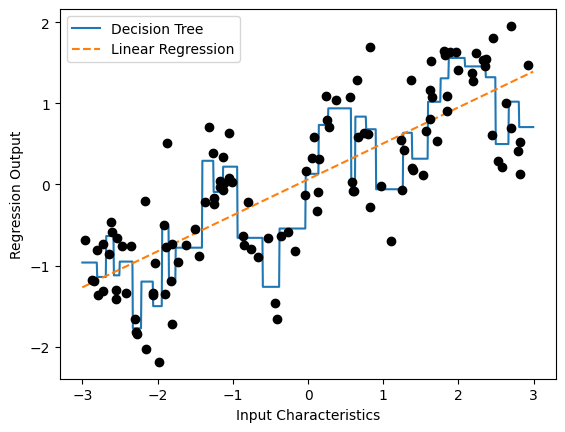

In [18]:
# wave 데이터셋에 적용한 선형 회귀와 결정 트리의 비교
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), "--", label="Linear Regression")
plt.plot(X[:, 0], y, "o", c="k")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output")
plt.legend(loc="best");

- 선형 모델은 선형 관계로만 모델링하므로 특성이 하나일 땐 직선으로 나타남
- 결정 트리는 이 데이터로 훨씬 복잡한 모델을 만들 수 있으나, 이는 데이터의 표현 형태에 따라 굉장히 달라짐
- 연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 구간 분한(bining)임 (이산화라고도 함)
- 이 특성의 입력값 범위(여기서는 -3 ~ 3)가 나뉘어 여러 구간으로, 예를 들면 10갸로 되어 있다고 생각
- 그럼 각 데이터 포인트가 어떤 구간에 속하는지로 나타낼 수 있음
- 구간의 경계를 정의하는 데는 여러 방법이 있음
- 예를 들어 균일한 너비로 (즉 구간의 경계 간의 거리가 동일하게) 하거나 데이터의 분위를 사용할 수 있음 (즉, 데이터가 많은 구간은 좁아짐)
- KBinsDiscretizer 클레스에 이런 방법들이 구현되어 있음

In [19]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=10, strategy="uniform")
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


c:\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


- 첫 번째 구간은 특성의 값이 -2.967(데이터에서 가장 작은 값)부터 -2.378까지 모든 데이터 포인트를 담음
- 두 번째 구간은 -2.378부터 -1.789 사이인 모든 데이터 포인트를 포함하고, 이런 식으로 계속됨
- KBinsDiscretizer는 한 번에 여러 개의 특성에 적용할 수 있음
- bin_edges_는 특성별로 경곗값이 저장되어 있고, 이 경우에는 길이가 1인 배열이 출력됨
- transform 메서드를 사용하면 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있음
- 기본적으로 KBinsDiscretizer는 구간에 원-핫-인코딩을 적용
- 구간마다 하나의 새로운 특성이 생기므로 희소 행렬을 만듦
- 10개의 구간을 지정했기 때문에 변환된 데이터는 10차원임

In [20]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [21]:
# 희소 행렬을 밀집 배열로 변환하여 원본 데이터 포인트와 인코딩 결과를 비교
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

- 첫 번째 데이터 포인트 -0.753이 네 번째 구간에 들어갔음
- 두 번째 데이터 포인트 2.704는 열 번째 구간에 포함되고, 이런 식으로 계속됨
- 여기에서 wave 데이터셋에 있는 연속형 특성을 각 데이터 포인트가 어느 구간에 속했는지 원-핫-인코딩한 범주형 특성으로 변환
- encode='ordinal'로 설정하면 원-핫-인코딩된 구간의 인덱스를 바로 계산할 수 있지만 유용하지는 않음
- 예제를 간단하게 만들기위해 encode='onehot-dense'로 지정하여 원-핫-인코딩된 밀집 배열을 만들고, 그러면 모든 특성을 바로 출력할 수 있음

c:\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


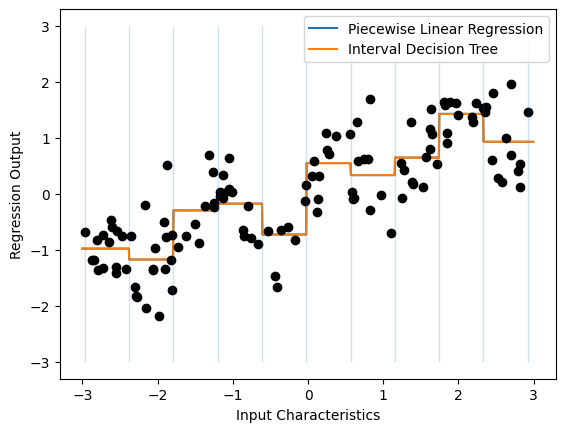

In [22]:
# 구간으로 나뉜 특성에 적용한 선형 회귀와 결정 트리 회귀의 비교
kb = KBinsDiscretizer(n_bins=10, strategy="uniform", encode="onehot-dense")
kb.fit(X)
X_binned = kb.transform(X)
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Piecewise Linear Regression")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Interval Decision Tree")
plt.plot(X[:, 0], y, "o", c="k")
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc="best")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output");

- 선형 회귀 모델과 결정 트리가 같은 예측을 만들어내서 파선과 실선이 완전히 겹쳐졌음
- 구간별로 이 두 모델이 예측한 것은 상숫값
- 각 구간 안에서는 특성이 값이 상수이므로, 어떤 모델이든 그 구간의 포인트에 대해서는 같은 값을 예측할 것
- 구간으로 나눈 특성을 사용하기 전과 비교해보면, 각 구간에서 다른 값을 가지고 있으므로 선형 모델이 훨씬 유연해진 것을 알 수 있음
- 반면에 결정 트리는 덜 유연해졌음
- 트리 모델은 데이터를 자유롭게 나눠 학습할 수 있으므로 특성의 값을 구간으로 나누는 것이 아무런 득이 되지 않음
- 다르게 생각하면 결정 트리는 데이터셋에서 예측을 위한 가장 좋은 구간을 학습한다고 볼 수 있음
- 거기다가 구간 나누기는 특성마다 따로 해야 하지만, 결정 트리는 한 번에 여러 특성을 살필 수 있으나, 선형 모델은 이런 변환으로부터 큰 이득을 얻었음
- 일부 특성과 출력이 비선형 관계이지만, 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는 데 아주 좋은 방법이 될 수 있음

# 5. 상호작용과 다항식
- 특별히 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용(Interaction)과 다항식(Polynomial)을 추가하는 것
- 이런 종류의 특성 공학은 통계적 모델링에서 자주 사용하지만 일반적인 머신러닝 애플리케이션에도 많이 적용함
- 선형 모델은 wave 데이터셋의 각 구간에 대해 상숫값을 학습했음
- 그런데 선형 모델은 이런 절편 외에도 기울기도 학습할 수 있음
- 선형 모델에 기울기를 추가하는 방법은 구간으로 분할된 데이터에 원래 특성(이 그림에서 x축)을 다시 추가하는 것
- 이렇게 하면 11차원 데이터셋이 만들어짐

In [23]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


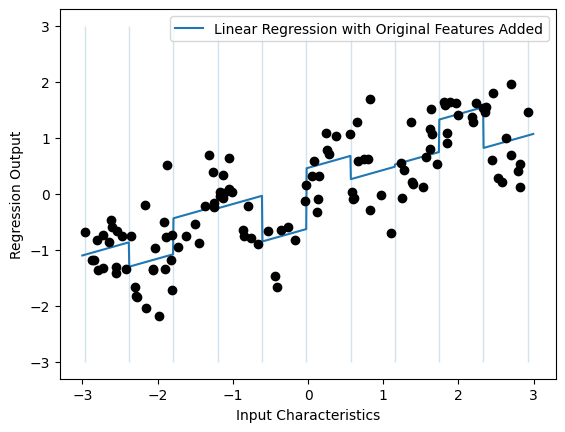

In [24]:
# 구간으로 분할된 특성과 하나의 기울기를 사용한 선형 회귀
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Linear Regression with Original Features Added")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)
plt.legend(loc="best")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output")
plt.plot(X[:, 0], y, "o", c="k");

- 이 예에서 이 모델은 각 구간의 절편과 기울기를 학습했음
- 학습된 기울기는 양수이고 모든 구가넹 걸쳐 동일하고, x축 특성이 하나이므로 기울기도 하나임
- 기울기가 모든 구간에서 같으니 별로 유익해 보이지 않음
- 오히려 각 구간에서 다른 기울기를 가지는 게 좋을 것 같습니다! 이런 효과를 위해서 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가할 수 있음
- 이 특성이 구간 특성과 원본 특성의 곱

In [25]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


- 데이터셋은 이제 데이터 포인트가 속한 구간과 이 구간에 원본 특성을 곱한 값을 더해 20개의 특성을 가짐
- 이 곱셈 특성을 각 구간에 대한 x축 특성의 복사본이라고 생각할 수 있음
- 즉 이 값은 구간 안에서는 원본 특성이고 다른 곳에서는 0임

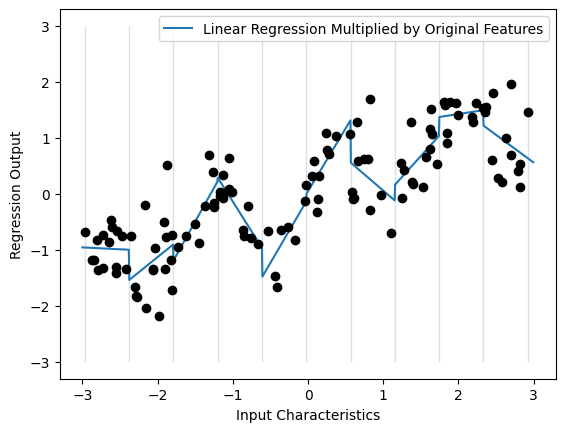

In [26]:
# 이 데이터를 사용해 만든 선형 모델의 결과
# 구간별 기울기가 다른 선형 회귀
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="Linear Regression Multiplied by Original Features")

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=0.2)

plt.plot(X[:, 0], y, "o", c="k")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output")
plt.legend(loc="best");

- 그림에서 볼 수 있듯이 이 모델에서는 각 구간에서 절편과 기울기가 모두 다름
- 구간 나누기는 연속형 특성을 확장하는 방법 중 하나
- 원본 특성의 다항식을 추가하는 방법도 있음
- 특성 x가 주어지면 x ** 2, x ** 3, x ** 4 등을 시도해볼 수 있음
- 이 방식이 preprocessing 모듈의 PolynomialFeatures에 구현되어 있음

In [27]:
from sklearn.preprocessing import PolynomialFeatures
# x ** 10까지 고차항을 추가
# 기본값인 "include_bias=True"는 절편에 해당하는 1인 특성을 추가
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [28]:
# 10차원을 사용했으므로 10개의 특성이 만들어짐
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [29]:
# X와 X_poly의 값을 비교
print("X 원소:\n", X[:5])
print("X_poly 원소\n", X_poly[:5])

X 원소:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [30]:
# 각 특성의 차수를 알려주는 get_feature_names_out 메서드를 사용해 특성의 의미를 알 수 있음
print("항 이름:\n", poly.get_feature_names_out())

항 이름:
 ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


- X-poly의 첫 번째 열은 X와 같고 다른 열은 첫 번째 열의 거듭제곱임
- 그래서 어떤 값은 매우 크게 나오는 것을 볼 수 있고, 두 번째 행은 다른 값보다 월등하게 커 20,000이 넘기도 함
- 다항식 특성을 선형 모델과 함께 사용하면 전형적인 다항 회귀(Polynomial Regression) 모델이 됨

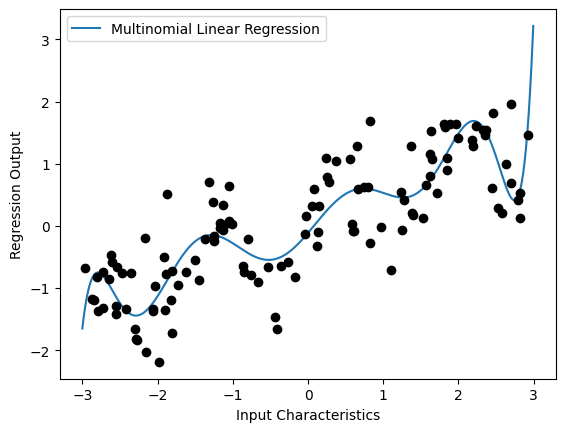

In [31]:
# 10차 다항식을 이용한 선형 회귀
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="Multinomial Linear Regression")
plt.plot(X[:, 0], y, "o", c="k")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output")
plt.legend(loc="best");

- 다항식 특성은 1차원 데이터셋에서도 매우 부드러운 곡선을 만듦
- 그러나 고차원 다항식은 데이터가 부족한 영역에서는 너무 민감하게 동작
- 비교를 위해 아무런 변환도 거치지 않은 원본 데이터에 커널 SVM 모델을 학습시킴

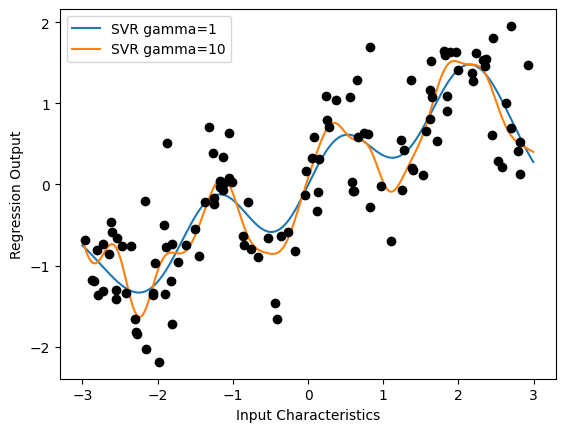

In [32]:
# RBF 커널 SVM의 gamma 매개변수 변화에 따른 비교
from sklearn.svm import SVR

for gamma in [1, 10]:
  svr = SVR(gamma=gamma).fit(X, y)
  plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))

plt.plot(X[:, 0], y, "o", c="k")
plt.xlabel("Input Characteristics")
plt.ylabel("Regression Output")
plt.legend(loc="best");

- 더 복잡한 모델인 커널 SVM을 사용해 특성 데이터를 변환하지 않고 다항 회귀와 비슷한 복잡도를 가진 예측을 만들었음
- 상호 작용과 다항식을 위한 더 현실적인 애플리케이션으로 보스턴 주택 가격 데이터셋을 이용
- 이 특성들이 어떻게 구성되었는지 살펴보고, 다항식 특성이 얼마나 도움이 되는지 살펴봄

In [33]:
# 데이터를 읽어 들이고 MinMaxScaler를 사용해 스케일을 0에서 1 사이로 조정
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston')

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# 데이터 스케일 조정
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [34]:
# 이제 차수를 2로 하여 다항식 특성을 뽑음
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- 이 데이터는 원래 특성이 13개인데 105개의 교차 특성으로 확장되었음
- 새로운 특성은 원래 특성의 제곱은 물론 가능한 두 특성의 조합을 모두 포함
- 즉 degree=2로 하면 원본 특성에서 두 개를 뽑아 만들 수 있는 모든 곱을 얻을 수 있음
- 어떤 원본 특성이 곱해져 새 특성이 만들어졌는지 정확한 관계를 보려면 get_feature_names 메서드를 사용

In [35]:
print("다항 특성 이름:\n", poly.get_feature_names_out())

다항 특성 이름:
 ['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x0^2' 'x0 x1' 'x0 x2' 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x0 x8'
 'x0 x9' 'x0 x10' 'x0 x11' 'x0 x12' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4' 'x1 x5'
 'x1 x6' 'x1 x7' 'x1 x8' 'x1 x9' 'x1 x10' 'x1 x11' 'x1 x12' 'x2^2' 'x2 x3'
 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7' 'x2 x8' 'x2 x9' 'x2 x10' 'x2 x11'
 'x2 x12' 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x3 x8' 'x3 x9' 'x3 x10'
 'x3 x11' 'x3 x12' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7' 'x4 x8' 'x4 x9' 'x4 x10'
 'x4 x11' 'x4 x12' 'x5^2' 'x5 x6' 'x5 x7' 'x5 x8' 'x5 x9' 'x5 x10'
 'x5 x11' 'x5 x12' 'x6^2' 'x6 x7' 'x6 x8' 'x6 x9' 'x6 x10' 'x6 x11'
 'x6 x12' 'x7^2' 'x7 x8' 'x7 x9' 'x7 x10' 'x7 x11' 'x7 x12' 'x8^2' 'x8 x9'
 'x8 x10' 'x8 x11' 'x8 x12' 'x9^2' 'x9 x10' 'x9 x11' 'x9 x12' 'x10^2'
 'x10 x11' 'x10 x12' 'x11^2' 'x11 x12' 'x12^2']


- 첫 번째 특성은 상수항, 즉 "1". 다음 13개 특성은 원본특성("x0"에서 "x12"까지)
- 그 다음은 첫 번째 특성의 제곱 항("x0^2")과 첫 번째 특성과 다른 특성 간의 조합
- 상호 작용 특성이 있는 데이터에 대해 Ridge를 사용해 성능을 비교

In [36]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


- 확실히 상호작용과 다항식 특성이 Ridge의 성능을 크게 높임
- 그러나 랜덤 포레스트 같이 더 복잡한 모델을 사용하면 이야기가 달라짐

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


- 특성을 추가하지 않아도 랜덤 포레스트는 Ridge의 성능과 맞먹음
- 오히려 상호작용과 다항식을 추가하면 성능이 조금 줄어듬

# 6. 일변량 비선형 변환
- 앞에서 제곱 항이나 세제곱 항을 추가하면 선형 회귀 모델에 도움이 됨을 보았음
- 한편 log, exp, sin 같은 수학 함수를 적용하는 방법도 특성 변환에 유용
- 트리 기반 모델은 특성의 순서에만 영향을 받지만 선형 모델과 신경망은 각 특성의 스케일과 분포에 밀접하게 연관되어 있음
- 그리고 특성과 타깃 값 사이에 비선형성이 있다면 특시 선형 회귀에서는 모델을 만들기가 어려움
- log와 exp 함수는 데이터의 스케일을 변경해 선형 모델과 신경망의 성능을 올리는 데 도움을 줌
- 2장에서 컴퓨터 메모리 가격 데이터를 사용한 애플리케이션을 보았음
- sin과 cos 함수는 이런 주기적인 패턴이 들어 있는 데이터를 다룰 때 편리
- 대부분의 모델은 각 특성이 (회귀에서는 타깃도) 정규분포와 비슷할 때 최고의 성능을 낼 수 있음
- 즉 특성의 히스토그램이 종 모양과 비슷할 때
- log나 exp 같은 함수를 사용하는 것은 편법이지만, 이런 모양을 만드는 쉽고 효과적인 방법
- 이런 변환이 도움되는 전형적인 경우는 정수 카운트 데이터를 다룰 때
- 카운트 데이터라면 "사용자가 얼마나 자주 로그인하는가?" 같은 특성을 말함
- 카운트에는 음수가 없으며 특별한 통계 패턴을 따르는 경우가 많음
- 여기서 실제 데이터의 속성과 비슷한 카운트 데이터를 만들어 사용
- 이 특성은 모두 정수이고 응답은 실수 임

In [38]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


- 첫 번째 특성 맨 앞 10개를 살펴보면 모두 양의 정수이지만 특정한 패턴은 보이지 않음
- 하지만 각 값이 나타난 횟수를 세면 그 분포가 잘 드러남

In [39]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


- 2가 68번으로 가장 많이 나타나며(bincount는 항상 0부터 시작)
- 큰 값의 수는 빠르게 줄어듦
- 그러나 85나 86처럼 아주 큰 값도 약간은 있음

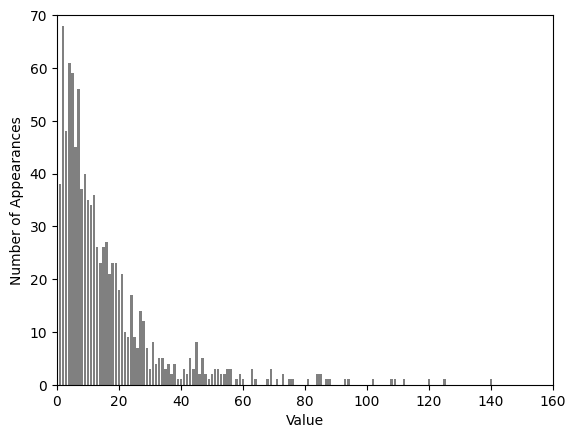

In [40]:
# X[0] 특성 값의 히스토그램
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color="grey")
plt.xlabel("Value")
plt.ylabel("Number of Appearances");

- X[:, 1]과 X[:, 2] 특성도 비슷. 이런 종류의 분포는 (작은 수치가 많고 큰 수치는 몇 안되는) 실제로 자주 나타남
- 그러나 선형 모델은 이런 데이터를 잘 처리하지 못함
- 이 데이터에 리지 회귀를 적용

In [41]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


- 비교적 낮은 R^2 점수가 나온 것으로 보아 Ridge는 X와 y의 관계를 제대로 모델링하지 못했음
- 하지만 로그 스케일로 변환하면 도움이 됨
- 데이터에 0이 있으면 log 함수를 적용할 수 없으므로(로그 0은 정의할 수 없음) log(X + 1)을 사용

In [42]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

- 변환 후를 보면 데이터의 분포가 덜 치우쳐 있으며 매우 큰 값을 가진 이상치가 보이지 않음

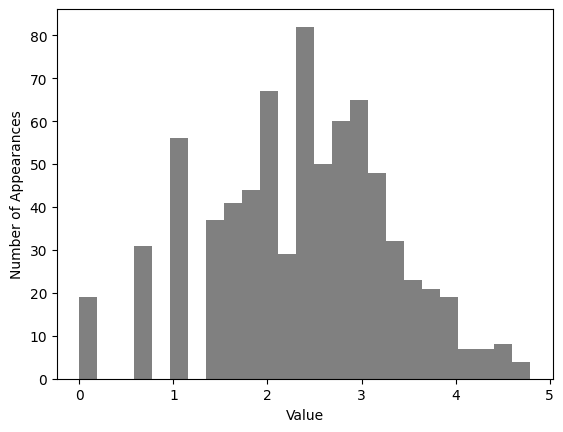

In [43]:
# 로그 변환 후 X[0] 특성 값의 히스토그램
plt.hist(X_train_log[:, 0], bins=25, color="gray")
plt.xlabel("Value")
plt.ylabel("Number of Appearances");

In [44]:
# 이 데이터에 리지 모델을 만들면 훨씬 좋은 결과가 나옴
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


- 데이터셋과 모델의 조합에 최적인 변환 방법을 찾는 것은 매우 복잡한 일
- 이 예에서는 모든 특성이 같은 속성을 가지고 있지만, 실제로 이런 경우는 드물며, 일부 특성만 변환하거나 특성마다 모두 다르게 변환하기도 함
- 앞서 언급한 대로 이런 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수
- 가끔 회쉬에서 타긱 변수 y를 변환 하는 것이 좋을 때도 있음
- 카운트(예컨데 주문 횟수)를 예측하는 경우가 전형적인 예로 log(y+1)를 사용해 변환하면 도움이 됨
- 이전 예에서 보았듯이 구간 분할, 다항식, 상호작용은 데이터가 주어진 상황에서 모델의 성능에 큰 영향을 줄 수 잇음
- 특별히 선형 모델이나 나이브 베이즈 모델 같은 덜 복잡한 모델일 경우
- 반면 트리 기반 모델은 스스로 중요한 상호작용을 찾아낼 수 있고 대부분의 경우 데이터를 명시적으로 변환하지 않아도 됨
- SVM, 최근접 이웃, 신경망 같은 모델은 이따금 구간 분할, 상호작용, 다항식으로 이득을 볼 수 있지만, 선형 모델보다는 영향이 그렇게 뚜렷하지 않음

# 7. 특성 자동 선택
- 새로운 특성을 만드는 방법이 많으므로 데이터의 차원이 원본 특성의 수 이상으로 증가하기 쉬움
- 그러나 특성이 추가되면 모델은 더 복잡해지고 과대적합될 가능성도 높아짐
- 보통 새로운 특성을 추가할 때나 고차원 데이터셋을 사용할 때, 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋음
- 이렇게 하면 모델이 간단해지고 일반화 성능이 올라감
- 어떤 특성이 좋은지를 판단하기 위해 일변량 통계, 모델 기반 선택, 반복적 선택이 있음
- 이 방법들은 모두 지도 학습 방법이므로 최적값을 찾으려면 타깃 값이 필요
- 데이터를 훈련 세트와 테스트 세트로 나눈 다음 훈련 데이터만 특성 선택에 사용해야 함

## 7-1. 일변량 통계 (Univariate Statistics)
- 일변량 통계에서는 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지를 계산
- 그런 다음 깊게 관련되어 있다고 판단되는 특성을 선택
- 분류에서는 분산분석(ANOVA, Analysis of Variance)이라고도 함
- 이 방법의 핵심 요소는 일변량, 즉 각 특성이 독립적으로 평가된다는 점
- 따라서 다른 특성과 깊게 연관된 특성은 선택되지 않을 것
- 일변량 분석은 계산이 매우 빠르고 평가를 위해 모델을 만들 필요가 없음
- 한편으로 이 방식은 특성을 선택한 후 적용하려는 모델에 상관없이 사용할 수 있음
- scikit-learn에서 일변량 분석으로 특성을 선택하려면 분류에서는 f_classif(기본값)를, 회귀에서는 f_regression을 보통 선택하여 테스트하고, 계산한 p-값(p-value)에 기초하여 특성을 제외하는 방식을 선택
- 이런 방식들은 매우 높은 p-값을 가진(즉 타깃 값과 연관성이 작을 것 같다는 뜻) 특성을 제외할 수 있도록 임계값을 조정하는 매개변수를 사용
- 임계값을 계산하는 방법은 각각 다르며 가장 간단한 SelectKBest는 고정된 k의 특성을 선택하고 SelectPercentile은 지정된 비율만큰 특성을 선택
- 그럼 cancer 데이터셋에 분류를 위한 특성 선택을 적용
- 문제를 조금 복잡하게 하기 위해 의미 없는 노이즈 특성을 데이터에 추가
- 특성 선택이 이 의미 없는 특성을 식별해서 제거하는지 살펴봄

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킴
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가
# 처음 30개는 원본 특성이고 다음 50개는 노이즈
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=0.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


- 결과에서 볼 수 있듯이 특성 개수가 80개에서 40개로 줄었음 (원본 특성의 50%)
- get_support 메서드는 선택된 특성을 불리언 값으로 표시해주어 어떤 특성이 선택되었는지 확인할 수 있음

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


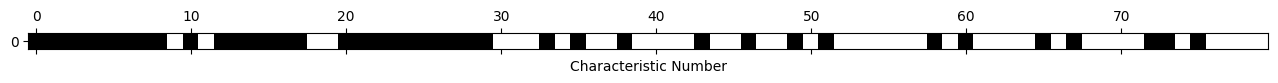

In [46]:
# SelectPercentile이 선택한 특성
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹
plt.matshow(mask.reshape(1, -1), cmap="gray_r")
plt.xlabel("Characteristic Number")
plt.yticks([0]);

- 마스킹 된 그래프에서 볼 수 있듯이 선택된 특성은 대부분 원본 특성이고 노이즈 특성이 거의 모두 제거되었으나, 원본 특성이 완벽하게 복원된 것은 아님
- 전체 특성을 이용했을 때와 선택된 특성만 사용했을 때 로지스틱 회귀의 성능을 비교

## 7-2. 모델 기반 특성 선택(Model-based Selection)
- 

## 7-3. 반복적 선택(Iterative Selection)
- 